# Описание проекта

### Анализ оттока клиентов банка «Метанпром»

Датасет содержит данные о клиентах банка «Метанпром». Банк находится в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Цель исследование:** 

1) Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

2) Сформулировать и проверить статистические гипотезы:
   
  - гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались
  - Гипотеза различия среднего возраста между теми клиентами, которые ушли и теми, которые остались   

# Подключение библиотек и загрузка данных

Подключим библиотеки, которые нужны для реализации проекта

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats as st
import plotly.express as px
import warnings

Загружаем данные для исследования

In [2]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv('bank_scrooge.csv')

In [3]:
display(df.head(10))
df.info()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Вывод**

Проблемы, которые предстоит исправить в предобработке данных:
     
     1) Привести названия столбцов к змеиному регистру
   
     2) Посмотреть явные и неявные дубликаты
   
     3) Проанализировать появление пропусков в столбцах `age` и `balance`
   
     4) Рассмотреть выбросы в столбцах
   
     5) Закодировать столбцы `city` и `gender`

# Предобработка данных

**1. Приведем названия столбцов к змеиному регистру**

In [4]:
df = df.rename(columns = {'USERID' : 'user_id', 'EST_SALARY' : 'est_salary'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**2. Явные дубликаты**

In [5]:
df.duplicated().sum()

0

Как можно увидеть, явных дубликатов нет в датасете

**3. Неявные дубликаты**

In [6]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [7]:
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [8]:
df['credit_card'].unique()

array([0, 1], dtype=int64)

In [9]:
df['last_activity'].unique()

array([1, 0], dtype=int64)

In [10]:
df['churn'].unique()

array([1, 0], dtype=int64)

Как можно увидеть, в столбцах с категориальными переменными и бинарными значениями нет никаких странных значений

**4. Пропуски**

In [11]:
print(df.isnull().sum() / len(df) * 100)

user_id           0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64


В датасете есть пропуски в двух столбцах: `age` и `balance`. В столбце `age` всего 0,2 процента пропусков или 26 строк. Посмотрим на эти строки, чтобы исключить систематичность этой ошибки.

In [12]:
display(df[df['age'].isna()])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


В данных строках нет какой-то систематической ошибки и пропуски не зависят от других переменных, также данных пропусков очень мало. Я думаю, что мы имеем право удалить данные строки без последствий для анализа.

In [13]:
df = df.dropna(subset = ['age']).reset_index(drop=True)
df['age'].isna().sum()

0

Теперь рассмотрим столбец `balance`

В данном случае пропусков много (22,95%), данный столбец содержит числа, но мы не можем заменять пропуски на среднюю или медиану, так как при исследовании придется убирать эти столбцы из-за искажения результата. Для того, чтобы корректно поступить, нужно исследовать от чего они возникли.

Сравним средние клиентов с пропусками и клиентов без пропусков


In [49]:
display(df.query("balance == balance", engine='python').mean())
warnings.filterwarnings("ignore")

user_id          171710.892268
score               843.744120
age                  42.924366
equity                3.394802
balance          827245.587515
products              2.081222
credit_card           0.640156
last_activity         0.515140
est_salary       124520.394264
churn                 0.234698
Ростов                0.153476
Рыбинск               0.272515
Ярославль             0.574009
female                0.516699
male                  0.483301
dtype: float64

In [50]:
df[df['balance'].isna()].mean()
warnings.filterwarnings("ignore")

Сравнили средние по каждому столбцу, среди тех кто не имеет пропусков и среди тех, кто имеет пропуски. Получили следующее:
- `score` выше у тех, у кого пропущен баланс на 2%
- `age` одинаковый
- `equity` выше у тех, что без пропусков в 66 раз
- `products` выше у тех, что без пропусков 
- `est_salary` выше у тех, кто имеет пропуски на 81%

Таким образом, клиенты с пропущенными значениями имеют более высокую среднюю зарплату и имеют очень маленькое количество баллов собственности по сравнению с теми клиентами, которые не имеют пропущенные значения в балансе. Поскольку пропуски относятся к определенной группе людей, то мы можем заменить их на средний баланс по данной группе.

In [16]:
old_balance = df.balance.copy()

In [17]:
display(df[df['balance'].isna()])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9950,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9958,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9967,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9970,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [18]:
print(df.groupby('equity')['balance'].apply(lambda x: x.isna().sum()))

equity
0    2164
1     114
2       0
3       1
4       0
5       0
6       0
7       0
8       0
9       0
Name: balance, dtype: int64


Как можно увидеть, практически все пропуски в столбце `balance` содержат клиенты, у который 0 баллов собственности, если быть точнее то их 2164. Те у кого один балл собственности 114.

Разобьем зарплаты клиентов на категории, и посмотрим на количество клиентов с пропусками в балансе в разрезе этих категорий.

In [19]:
def est_salary_category(est_salary):
    if 0 < est_salary <= 100000:
        return 'A'
    if 100000 < est_salary <= 200000:
        return 'B'
    if 200000 < est_salary <= 300000:
        return 'C'
    if 300000 <= est_salary:
        return 'D'   
df['est_salary_category'] = df['est_salary'].apply(est_salary_category)
display(df.head(10))
print(df.groupby('est_salary_category')['balance'].apply(lambda x: x.isna().sum()))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,est_salary_category
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,A
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,A
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,B
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,B
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,A
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0,B
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,B
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0,A
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0,B
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,C


est_salary_category
A     379
B    1031
C     523
D     346
Name: balance, dtype: int64


Будем заменять пропуски средними в разрезе категорий по зарплате и баллам собственности.

In [20]:
mean_by_group = df.groupby('est_salary_category')['balance'].mean()
print(mean_by_group)

est_salary_category
A    5.676842e+05
B    7.999352e+05
C    1.292853e+06
D    4.077234e+06
Name: balance, dtype: float64


Теперь в датафрейме нет пропущенных значений, работа с ними закончена.

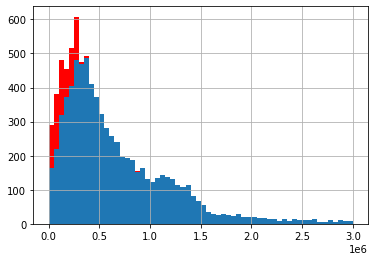

In [21]:
top, step = 3e6, 5e4
bins = np.arange(0,top+step,step)

groups_cols = ['est_salary_category','city','churn','products','gender','credit_card','equity','last_activity','age']
old_balance = df.balance.copy()

new_balance = df.balance.fillna(df.assign(age=df.age.round(-1)).groupby(groups_cols)['balance'].transform('mean'))

new_balance.hist(bins=bins, color='r')
old_balance.hist(bins=bins);

**5. Выбросы**

In [22]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Все данные выглядят нормально, поэтому ничего изменять не будем

**6. Кодирование столбцов `gender` и `city`**

In [23]:
df['cit'] = df['city']
df['gen'] = df['gender']
df = pd.get_dummies(df, columns = ['cit','gen'])
display(df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,est_salary_category,cit_Ростов,cit_Рыбинск,cit_Ярославль,gen_Ж,gen_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,A,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,A,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,B,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,B,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,A,0,0,1,0,1


Переименуем новые столбцы, чтобы с ними было проще работать

In [24]:
df = df.rename (
    columns = ({
        'cit_Ростов':'Ростов', 'cit_Рыбинск':'Рыбинск','cit_Ярославль':'Ярославль', 
        'gen_Ж':'female', 'gen_М':'male'}))
display (df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,est_salary_category,Ростов,Рыбинск,Ярославль,female,male
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,A,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,A,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,B,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,B,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,A,0,0,1,0,1


# Исследовательский анализ данных

**1.Сравним средние по столбцам среди отточных клиентов и неотточных**

In [25]:
mean_df = df.groupby('churn').agg('mean').round(2).T
mean_df = mean_df.rename(columns = {0:'Остались', 1:'Ушли'})
mean_df["diff"] = ((mean_df["Ушли"] - mean_df["Остались"]) / mean_df["Остались"]) * 100
display(mean_df)

churn,Остались,Ушли,diff
user_id,171928.11,170980.10,-0.551399
score,845.40,863.42,2.131535
age,43.02,41.45,-3.649465
equity,2.38,3.76,57.983193
balance,733031.63,1134458.21,54.762518
products,1.76,2.38,35.227273
credit_card,0.71,0.55,-22.535211
last_activity,0.48,0.70,45.833333
est_salary,147674.64,148289.70,0.416497
Ростов,0.14,0.15,7.142857


- У отточных клиентов средний баланс на счете больше на 401 427 рублей или 54%. 
- `score` у отточных больше на 18 или на 2%
- `equity` у отточнвх больше на 1.38 или 36%
- Среднее количество продуктов у отточных больше на 26%
- Зарплаты у отточных и оставшихся одинаковые

**2.Построим матрицу корреляций, чтобы выяснить какие присутствуют зависимости между переменными**

<AxesSubplot:>

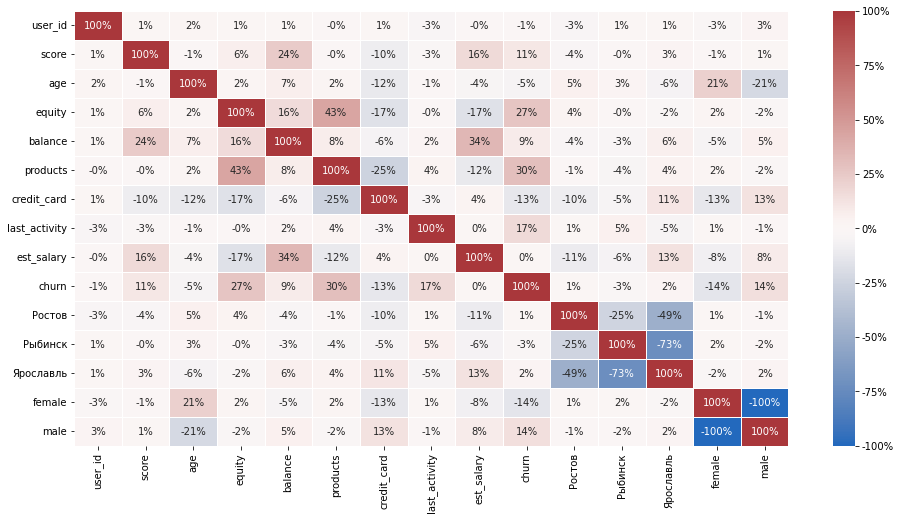

In [26]:
plt.figure(figsize=(16,8))
fmt = lambda x,pos: '{:.0%}'.format(x)
sns.heatmap (df.corr(), annot=True, fmt=".0%" ,vmin=-1, vmax=1, center= 0, cmap= 'vlag', linewidths=1, cbar_kws={'format': FuncFormatter(fmt)})

**Вывод**

Из матрицы корреляций можно увидеть, что наибольшую корреляцию со столбцом `churn` имеют следующие столбцы:

   1) Баллы кредитного скоринга `score` 

   2) Количество баллов собственности `equity`

   3) Количество продуктов, которыми пользуется клиент `products`
   
   4) Наличие кредитной карты `credit_card`

   5) Активный клиент `last_activity`

   6) Пол клиента `female` и `male`

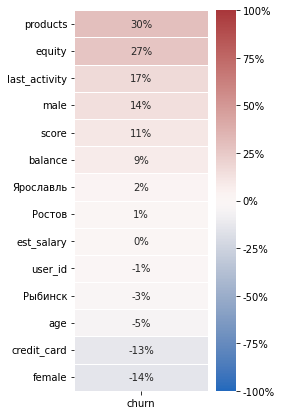

In [27]:
correlation_matrix = df.corr()
churn_corr = correlation_matrix['churn'].drop('churn').sort_values(ascending=False)
plt.figure(figsize=(3, 7))
sns.heatmap(churn_corr.to_frame(), annot=True, fmt=".0%" ,vmin=-1, vmax=1, center= 0 ,cmap= 'vlag', linewidths=1, cbar_kws={'format': FuncFormatter(fmt)})
plt.show()

**3.Построим гистограммы процента отточных клиентов по этим столбцам**

**Рассмотрим отточных и неотточных клиентов в разбивке по столбцу `score`**

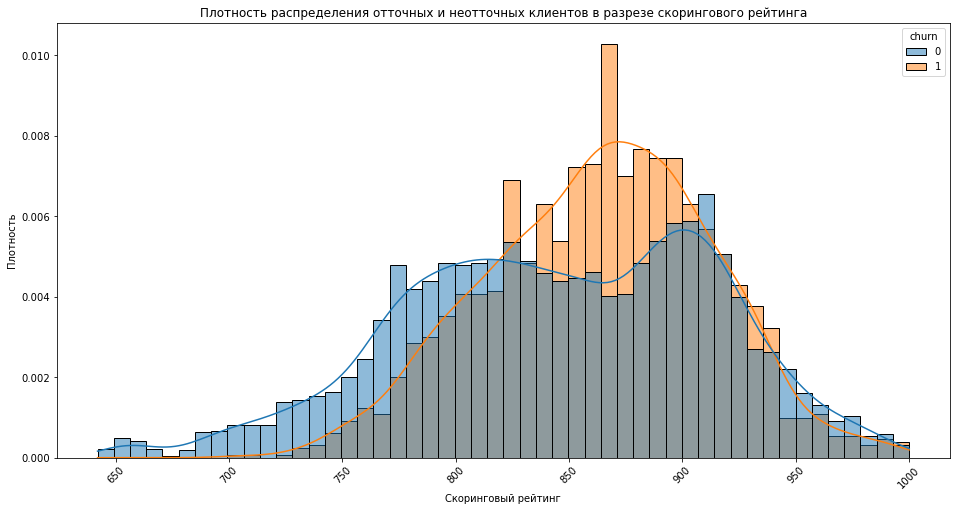

In [28]:
plt.figure(figsize=(16,8))
ax = sns.histplot(data=df, x="score", hue = 'churn' ,bins = 50 ,kde=True, stat='density', common_norm=False)
ax.set (xlabel='Скоринговый рейтинг',
 ylabel='Плотность',
 title='Плотность распределения отточных и неотточных клиентов в разрезе скорингового рейтинга')
plt.xticks(rotation=45) 
plt.show()

По данному графику мы можем понять, что там, где плотность распределения отточных клиентов выше плотности распределения неотточных, при таком скоринговом рейтинге отточность выше средней отточности по банку. Получаем, что интервал с высокой отточностью по скоринговому рейтингу находится от 825 до 940.

**Рассмотрим количество баллов собственности `equity`**

,equity,sum,count,percent
0,0,90,2576,3.493789
1,1,93,773,12.031048
2,2,166,1051,15.794481
3,3,322,1541,20.895522
4,4,464,1847,25.121819
5,5,576,1915,30.078329
6,6,58,161,36.024845
7,7,37,80,46.250000
8,8,6,17,35.294118
9,9,7,13,53.846154


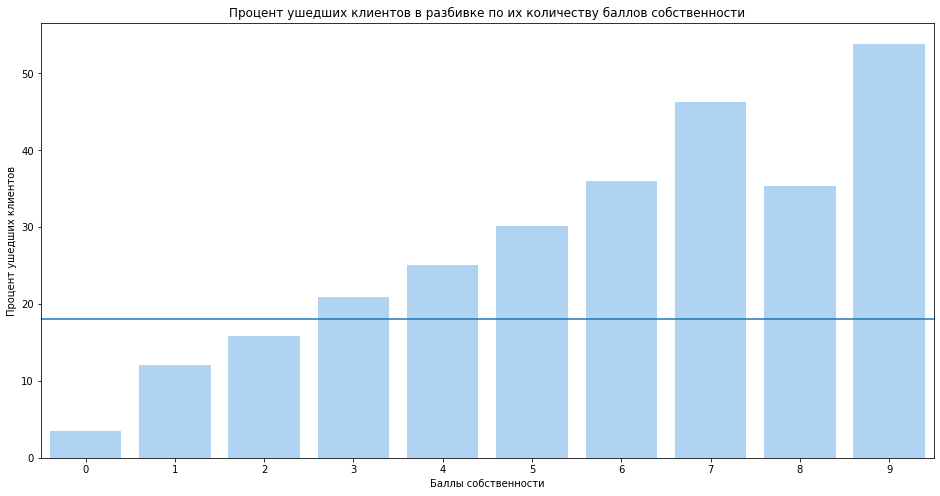

In [29]:
equity_churn = df.pivot_table (index = 'equity', values = 'churn', aggfunc =['sum', 'count'])
equity_churn.columns = equity_churn.columns.droplevel(level=1)
equity_churn ['percent'] = equity_churn['sum']/equity_churn['count']*100
equity_churn.reset_index(inplace= True)
display(equity_churn.head(10))

plt.figure(figsize=(16,8))
ax = sns.barplot(data=equity_churn, x="equity", y = "percent", color='#1E90FF', alpha=0.4)
plt.axhline(y=18)
ax.set (xlabel='Баллы собственности',
 ylabel='Процент ушедших клиентов',
 title='Процент ушедших клиентов в разбивке по их количеству баллов собственности') 
plt.show()

Как можно увидеть, чем больше у клиента баллов собственности, тем выше процент оттока клиентов у банка. При количестве баллов собственности выше 4 отток клиентов в разрезе баллов собственности выше, чем средний отток по банку. Предположительно, это может означать, что банк не предлагает какие-либо услуги клиентам, связанные с их имуществом.

**Рассмотрим количество продуктов, которыми пользуется клиент `products`**

,products,sum,count,percent
0,1,235,3323,7.071923
1,2,978,5119,19.105294
2,3,297,1038,28.612717
3,4,300,474,63.291139
4,5,8,19,42.105263


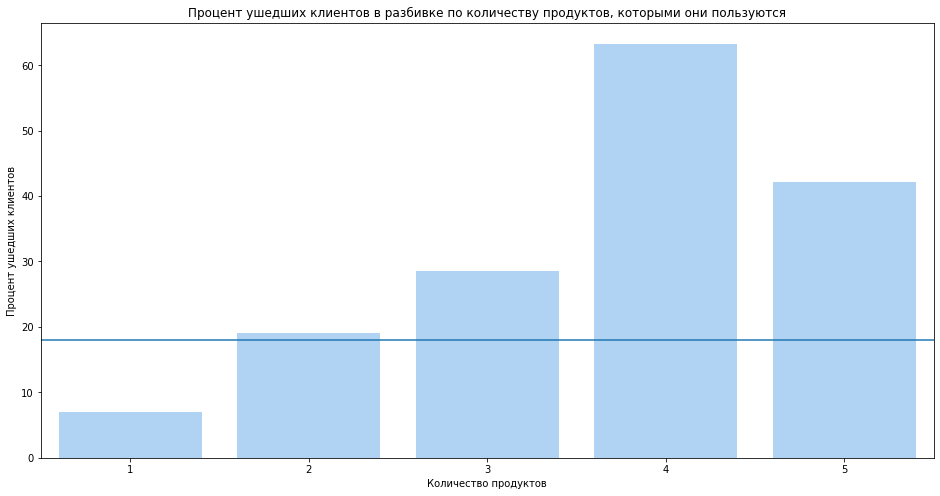

In [30]:
products_churn = df.pivot_table (index = 'products', values = 'churn', aggfunc =['sum', 'count'])
products_churn.columns = products_churn.columns.droplevel(level=1)
products_churn ['percent'] = products_churn['sum']/products_churn['count']*100
products_churn.reset_index(inplace= True)
products_churn = products_churn.drop(index=[0])
products_churn = products_churn.reset_index(drop=True)
display(products_churn.head(10))


plt.figure(figsize=(16,8))
ax = sns.barplot(data=products_churn, x="products", y = "percent", color = '#1E90FF', alpha=0.4)
plt.axhline(y=18)
ax.set (xlabel='Количество продуктов',
 ylabel='Процент ушедших клиентов',
 title='Процент ушедших клиентов в разбивке по количеству продуктов, которыми они пользуются') 
plt.show()

Здесь также наблюдается тенденция, что чем больше количество продуктов, которыми пользуются клиенты, чем больше процент оттока клиентов. При количестве продуктов от 3, отток клиентов в разрезе количества продуктов больше среднего оттока по банку.

**Рассмотрим наличие кредитных карт у клиентов `credit_card` , относительно оттока клиентов `churn`**

,credit_card,sum,count,percent
0,0,816,3190,25.579937
1,1,1003,6784,14.784788


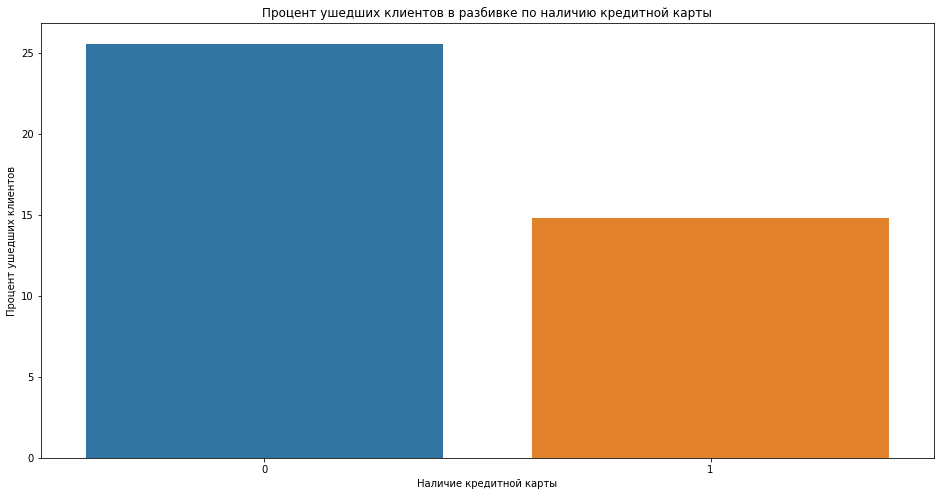

In [31]:
credit_card_churn = df.pivot_table (index = 'credit_card', values = 'churn', aggfunc =['sum', 'count'])
credit_card_churn.columns = credit_card_churn.columns.droplevel(level=1)
credit_card_churn ['percent'] = credit_card_churn['sum']/credit_card_churn['count']*100
credit_card_churn.reset_index(inplace= True)
credit_card_churn = credit_card_churn.reset_index(drop=True)
display(credit_card_churn.head())


plt.figure(figsize=(16,8))
ax = sns.barplot(data=credit_card_churn, x="credit_card", y = "percent")
ax.set (xlabel='Наличие кредитной карты',
 ylabel='Процент ушедших клиентов',
 title='Процент ушедших клиентов в разбивке по наличию кредитной карты') 
plt.show()

Здесь мы видим вполне базовые вещи для банковской системы, клиенты, которые имеют кредитные карты данного банка, меньше уходят из банка. Я думаю это связано с тем, что кредитная карта накладывает определенные обязательства на клиента в виде выплаты процентов заемных средств, таким образом, клиенты тратят деньги, затем возвращают их, и потом опять тратят, попадая в своеборазную петлю.

**Рассмотрим активность клиентов `last_activity` , относительно оттока клиентов `churn`**

,last_activity,sum,count,percent
0,0,542,4759,11.388947
1,1,1277,5215,24.487057


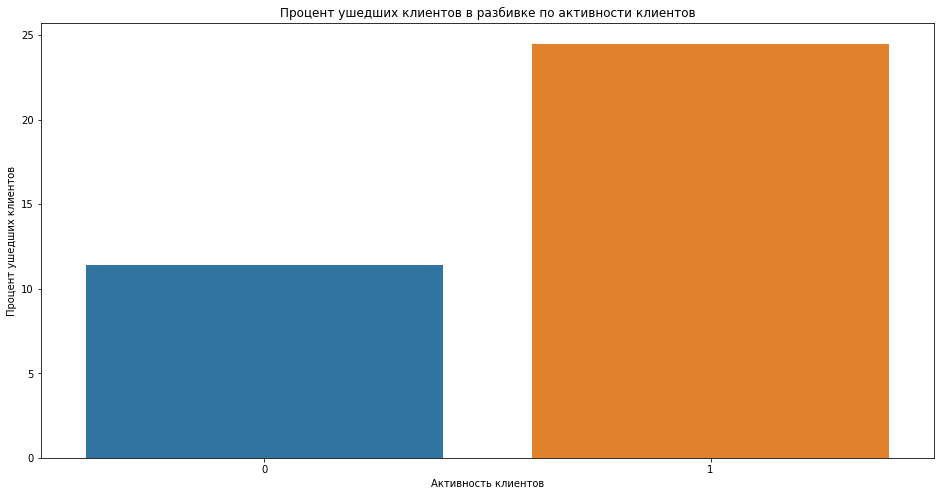

In [32]:
last_activity_churn = df.pivot_table (index = 'last_activity', values = 'churn', aggfunc =['sum', 'count'])
last_activity_churn.columns = last_activity_churn.columns.droplevel(level=1)
last_activity_churn ['percent'] = last_activity_churn['sum']/last_activity_churn['count']*100
last_activity_churn.reset_index(inplace= True)
last_activity_churn = last_activity_churn.reset_index(drop=True)
display(last_activity_churn.head())


plt.figure(figsize=(16,8))
ax = sns.barplot(data=last_activity_churn, x="last_activity", y = "percent")
ax.set (xlabel='Активность клиентов',
 ylabel='Процент ушедших клиентов',
 title='Процент ушедших клиентов в разбивке по активности клиентов') 
plt.show()

В данном случае мы видим, что у активных клиентов процент ухода из банка выше в 2 раза. Возможно это может быть связано с тем, что клиенты не удовлетворены какими-то продуктами банка или их недостаточно, и они не покрывают все нужды активных клиентов.

**Рассмотрим пол клиента `female` и `male` в разбивке по отточности `churn`**

,gender,sum,count,percent
0,Ж,636,4983,12.763396
1,М,1183,4991,23.702665


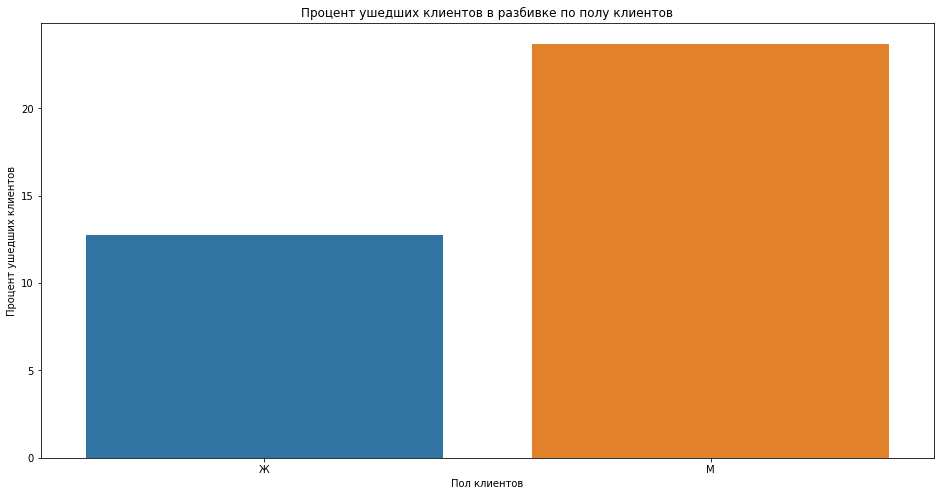

In [33]:
gender_churn = df.pivot_table (index = 'gender', values = 'churn', aggfunc =['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['percent'] = gender_churn['sum']/gender_churn['count']*100
gender_churn.reset_index(inplace= True)
gender_churn = gender_churn.reset_index(drop=True)
display(gender_churn.head())


plt.figure(figsize=(16,8))
ax = sns.barplot(data=gender_churn, x="gender", y = "percent")
ax.set (xlabel='Пол клиентов',
 ylabel='Процент ушедших клиентов',
 title='Процент ушедших клиентов в разбивке по полу клиентов') 
plt.show()

Как можно увидеть, отток среди мужчин в два раза выше. Я думаю это связано с тем. что мужчины, как клиенты банка, могут быть активнее и пользоваться большим количеством продуктов, а как выяснилось выше, активные пользователи больше уходят из банка.

**Рассмотрим город `city` в разбивке по отточности `churn`**

,city,sum,count,percent
0,Ростов,265,1416,18.714689
1,Рыбинск,437,2683,16.287738
2,Ярославль,1117,5875,19.012766


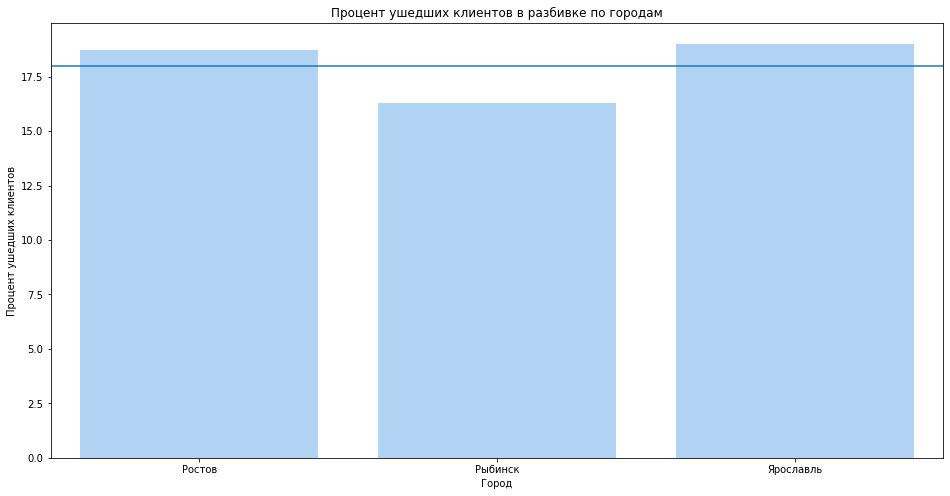

In [34]:
city_churn = df.pivot_table (index = 'city', values = 'churn', aggfunc =['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['percent'] = city_churn['sum']/city_churn['count']*100
city_churn.reset_index(inplace= True)
city_churn = city_churn.reset_index(drop=True)
display(city_churn.head())


plt.figure(figsize=(16,8))
ax = sns.barplot(data=city_churn, x="city", y = "percent", color = '#1E90FF', alpha=0.4)
plt.axhline(y=18)
ax.set (xlabel='Город',
 ylabel='Процент ушедших клиентов',
 title='Процент ушедших клиентов в разбивке по городам') 
plt.show()

Как мы можем увидеть, нет города, который бы выделялся высокой отточностью, только у двух городов отток выше на 1%, чем средний отток по банку, поэтому данный столбец мы не будем учитывать при сегментации.

**Рассмотрим также столбец `age`, хотя он и не коррелирует с нашей целевой переменной, потому что для сегментации это достаточно важный признак**

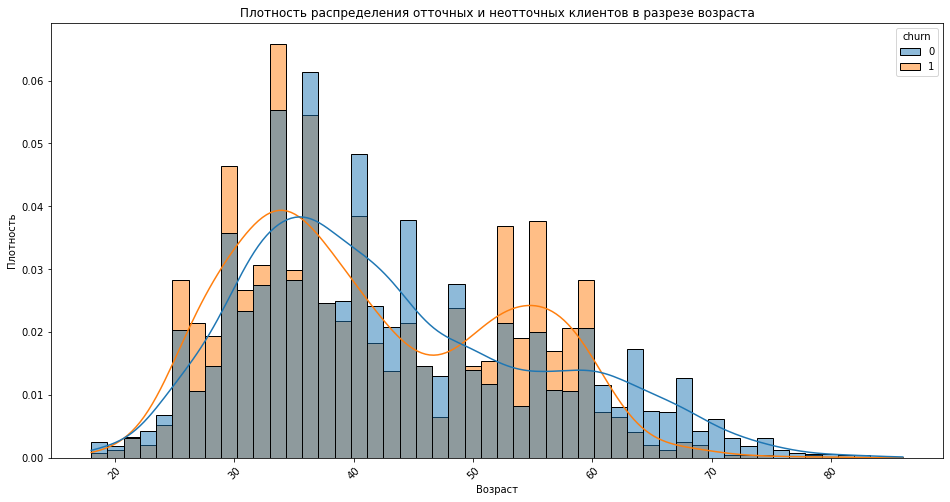

In [35]:
plt.figure(figsize=(16,8))
ax = sns.histplot(data=df, x="age", hue = 'churn' ,bins = 50 ,kde=True, stat='density', common_norm=False)
ax.set (xlabel='Возраст',
 ylabel='Плотность',
 title='Плотность распределения отточных и неотточных клиентов в разрезе возраста')
plt.xticks(rotation=45) 
plt.show()

На графике выделяются 3 группы возрастов, где количество ушедших очень маленькое относительно других: от 18 до 23, от 36 до 49 и от 61. Также есть две группы где потери банка очень высокие: от 24 до 35 и от 50 до 60. Данная информация поможет нам сегментировать пользователей. Также по данному столбцу можно проверить гипотезу.

**Рассмотрим баланс `balance` в разбивке по отточности `churn`**

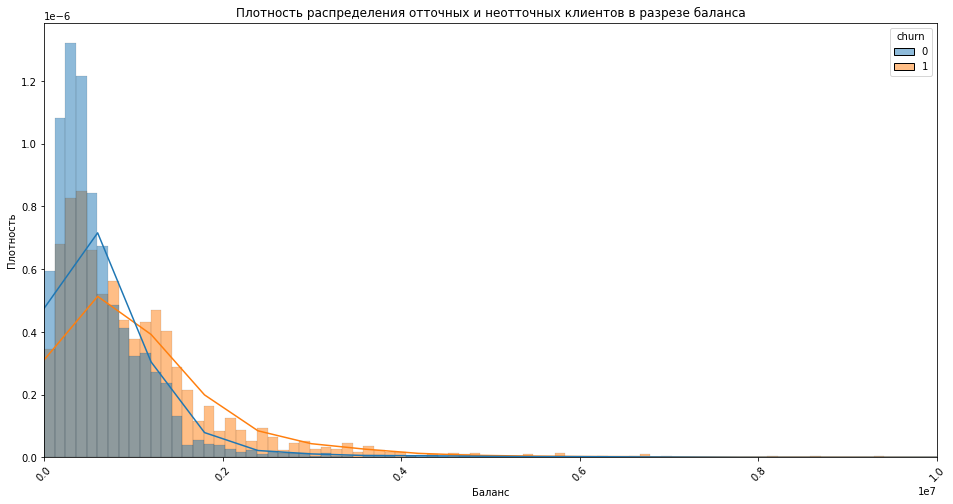

In [36]:
plt.figure(figsize=(16,8))
ax = sns.histplot(data=df, x="balance", hue = 'churn' ,bins = 1000 ,kde=True, stat='density', common_norm=False)
ax.set (xlabel='Баланс',
 ylabel='Плотность',
 title='Плотность распределения отточных и неотточных клиентов в разрезе баланса')
plt.xlim (0,10000000 )
plt.xticks(rotation=45) 
plt.show()

При балансе от 1 миллиона получаем высокую отточность клиентов банка. До 1 миллиона люди в основном остаются клиентами банка.

**Рассмотрим доходы `est_salary` в разбивке по отточности `churn`**

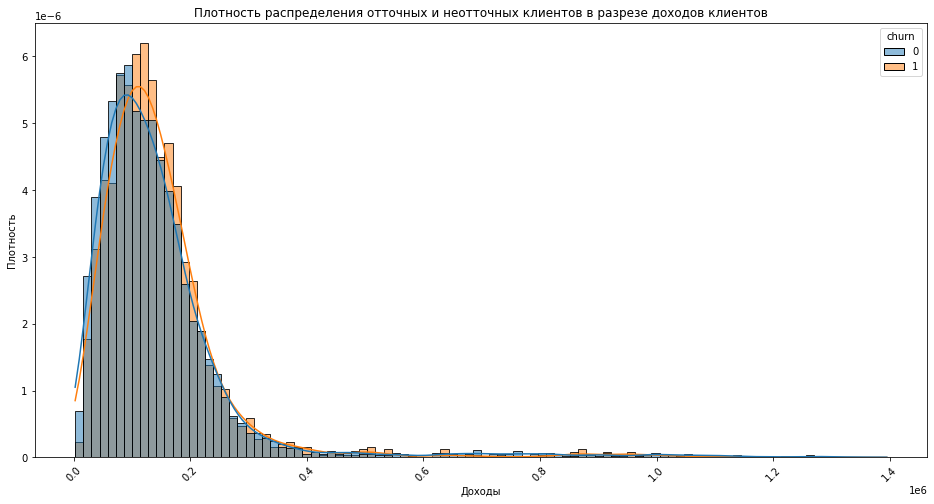

In [37]:
plt.figure(figsize=(16,8))
ax = sns.histplot(data=df, x="est_salary", hue = 'churn' ,bins = 100 ,kde=True, stat='density', common_norm=False)
ax.set (xlabel='Доходы',
 ylabel='Плотность',
 title='Плотность распределения отточных и неотточных клиентов в разрезе доходов клиентов')
plt.xticks(rotation=45) 
plt.show()

Высокая отточность наблюдается в интервале от 150 тысяч до 220 тысяч.

Прежде чем делать выводы, сделаем проверку статистических гипотез, чтобы наиболее точно провести сегментацию.

# Проверка статистических гипотез

**1. Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались**

Гипотеза H0: Средние доходы оставшихся и отточных клиентов равны

Гипотеза H1: Средние доходы оставшихся и отточных клиентов не равны

В данном случае у нас имеется два критерии для проверки данной гипотезы: критерий Стьюдента и критерий Манна-Уитни. Так как выборки большие, то нам неважно, что они распределены ненормально, мы можем использовать t-критерий. Таким образом нормальное распределение для выборок более 30-50 элементов не требуется для t-теста. Требуется отсутствие большого числа выбросов, так как это не робастный критерий. Но выбросы можно отфильтровать. В среднем у u-критерия Манна-Уитни мощность выше, чем у t-критерия, т.е. он чаще даёт более точный результат. Основной минус критерия Манна-Уитни — его слабая интерпретируемость для бизнеса. Если мы сраниваем суммы покупок, то t-критерий позволяет нам сравнить средний чек — величину, которую можно перевести в выручку, умножив на количество покупок. U-критерий же, по сути, будет сравнивать медианный чек, который практически не используется.

**Воспользуемся критерием Стьюдента**

In [38]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df[df['churn'] == 0]['est_salary'], df[df['churn'] == 1]['est_salary'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8515799588935961
Не получилось отвергнуть нулевую гипотезу


Получаем, что средние доходы оставшихся и отточных клиентов равны.

**Воспользуемся критерием Манна-Уитни** 

In [39]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(df[df['churn'] == 0]['est_salary'], df[df['churn'] == 1]['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else: 
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.0001941125216825749
Отвергаем нулевую гипотезу: разница статистически значима


В данном случае получили, что средние доходы оставшихся и отточных клиентов не равны.

Мы получили различные результаты при применении двух разных критериев для одних и тех же данных. t-критерий Стьюдента является параметрическим, что означает, что он основан на определенной модели и требует точных расчетов. U-критерий Манна-Уитни, с другой стороны, является непараметрическим и основывается на рангах данных. Это может привести к разным результатам, особенно если данные имеют выбросы или нарушают предположения о распределении.

**Критерий Стьюдента больше подходит для проверки средних величин двух независимых выборок, поэтому в данном случае, он будет более сильным критерием для проверки нашей гипотезы.**

Если выбросы удалить из данных, то t-тест может стать более точным. Однако, это может привести к потере информации.

In [40]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
df_test = df.query('est_salary < 700000')
results = st.ttest_ind(df_test[df_test['churn'] == 0]['est_salary'], df_test[df_test['churn'] == 1]['est_salary'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.013625482565063244
Отвергаем нулевую гипотезу


**2.Гипотеза различия среднего возраста между теми клиентами, которые ушли и теми, которые остались**

Гипотеза H0: Средний возраст оставшихся и отточных клиентов равны

Гипотеза H1: Средние возраст оставшихся и отточных клиентов не равны

**Воспользуемся критерием Стьюдента**

In [41]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df[df['churn'] == 0]['age'], df[df['churn'] == 1]['age'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 6.503036883995611e-07
Отвергаем нулевую гипотезу


Выше мы рассматривали данный столбец, хоть он никак не коррелирует с оттоком клиентов, но в нем выделяются 4 группы, имеющие сильную разницу в оттоке клиентов. Данной гипотезой мы подтвердили, что все таки средний возраст оставшихся и отточных клиентов разнится. В банке преимущественно остаются самая молодая категория и самая взрослая, так как данная группа меньше всего пользуется обширным количеством продуктов. А вот наибольший отток у двух средних групп по возрасту клиентов.

# Промежуточный вывод

Мы провели исследовательский анализ данных, а также проверили 2 гипотезы. С помощью этого было выявлено:
    
    1) Скоринговый рейтинг коррелирует с целевой переменной. Отточный интервал от 825 до 940.
    
    2) Количестве баллов собственности коррелирует с целевой переменной. Отточный интервал от 4 до 9. 
    
    3) Количество продуктов также коррелирует с целевой переменной. Отточный интервал от 3 до 5.
    
    4) Клиент не имеющий кредитной карты также охотнее уходит из банка.
    
    5) У более активных клиентов выше процент оттока.
    
    6) Мужчины имеют в 2 раза больший процент оттока из банка, нежели женщины.
    
    7) Также рассмотрели столбец с возрастом, который не коррелирует с целевой переменной. Здесь можно выделить 4 группы клиентов по возрасту. Две группы: от 24 до 35 и от 50 до 60 самые высокоотточные.
    
    8) Баланс не коррелирует с целевой переменной. При балансе от 1 миллиона получаем высокую отточность клиентов банка.
    
    9) Доходы клиентов не коррелируют с целевой переменной. Отточный интервал от 150 тысяч до 220 тысяч.
    
    10) Проверили гипотезу об различие доходов отточных и оставшихся клиентов. Получили, что средние доходы оставшихся и отточных клиентов равны.
    
    11) Также проверили гипотезу о различии среднего возраста оставшихся и отточных клиентов. Гипотеза не подтвердилась, средние возрасты не равны, а значит, данная информация повлияет на сегментацию в целом, и на процент оттока в каждом из сегментов.

Теперь мы можем перейти к разделу сегментации. Признаки, которые мы будем использовать для сегментации:

- Скоринговый рейтинг 

- Количество баллов собственности

- Количество продуктов

- Возраст

- Пол

- Активный клиент или нет

- Наличие кредитной карты

# Сегментация

**Сегмент №1**

- Скоринговый рейтинг от 825 до 940
- Количество продуктов выше 2

In [42]:
df.query('score >= 825 and score <= 940 and products > 2 ').agg({"churn":["mean","sum","count"]})

,churn
mean,0.47486
sum,425.00000
count,895.00000


Процент оттока составляет 47% в данном сегменте, что довольно много.

**Сегмент №2**

- Количество баллов собственности выше 4
- Активный клиент
- Нет кредитной карты

In [43]:
df.query('equity >= 4 and last_activity == 1 and credit_card == 0 ').agg({"churn":["mean","sum","count"]})

,churn
mean,0.496637
sum,443.000000
count,892.000000


Получили процент оттока пользователей в данном сегменте 49%. 

**Сегмент №3**

- Количество продуктов выше 3
- Пол мужской 

In [44]:
df.query('products >= 3 and male == 1').agg({"churn":["mean","sum","count"]})

,churn
mean,0.5
sum,376.0
count,752.0


В данной группе мы достигли уровня оттока в 50%.

# Вывод

В данном проекте мы провели **предобработку данных**, при которой данные были проверены на начилие явных и неявных дубликатов, проведена проверка на наличие пропусков и выбросов, а также были закодированы 2 столбца для удобства работы с ними.

Также был проведен **исследовательский анализ данных**, в ходе которого мы выяснили:
- Скоринговый рейтинг коррелирует с целевой переменной. Отточный интервал от 825 до 940.
    
- Количестве баллов собственности коррелирует с целевой переменной. Отточный интервал от 4 до 9. 
    
- Количество продуктов также коррелирует с целевой переменной. Отточный интервал от 3 до 5.
    
- Клиент не имеющий кредитной карты также охотнее уходит из банка.
    
- У более активных клиентов выше процент оттока.
    
- Мужчины имеют в 2 раза больший процент оттока из банка, нежели женщины.
    
- Также рассмотрели столбец с возрастом, который не коррелирует с целевой переменной. Здесь можно выделить 4 группы клиентов по возрасту. Две группы: от 24 до 46 и от 47 до 62 самые высокоотточные.

**Проверили 2 статистические гипотезы :**
1) Гипотеза об различие доходов отточных и оставшихся клиентов. Получили, что **средние доходы оставшихся и отточных клиентов равны**.

2) Гипотеза о различии среднего возраста оставшихся и отточных клиентов. Гипотеза не подтвердилась, **средние возрасты оставшихся и отточных клиентов не равны**.

Была проведена **сегментация отточных пользователей**, также к каждому сегменту будет дана рекомендация отделу маркетинга, сегменты расположены по уменьшению процента оттока пользователей:
1) **Сегмент №3 (отток 50%)**
  - Количество продуктов выше 3
  
  - Пол мужской  

**Рекомендация отделу маркетинга:** 
- Выгодные условия кредитования для новой недвижимости
- Кредитная карта с увеличенным беспроцентным периодом
- Страхование уже имеющейся собственности
- Кэшбек на заправки

2) **Сегмент №2 (отток 49%)**
  - Количество баллов собственности выше 4
  
  - Активный клиент
  
  - Нет кредитной карты

**Рекомендация отделу маркетинга:** 
- Кредитная карта с увеличенным беспроцентным периодом
- Предлагать лизинги на автомобили(если есть у человека компания)
- Выгодные условия кредитования для новой недвижимости


3) **Сегмент №1 (отток 47%)**
   
  - Скоринговый рейтинг от 825 до 940
  
  - Количество продуктов выше 2
   
**Рекомендация отделу маркетинга:**
- Кредитная карта с увеличенным беспроцентным периодом
- Предложение сделать зарплатную карту данного банка
- Выгодные условия кредитования для новой недвижимости